In [134]:
import warnings
warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc

In [135]:
train_id = pd.read_csv("train_identity.csv")
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [136]:
train_txn = pd.read_csv("train_transaction.csv")
train_txn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [138]:
train_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [139]:
test_id = pd.read_csv("test_identity.csv")
test_txn = pd.read_csv("train_transaction.csv")

In [140]:
test_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

In [141]:
test_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [142]:
train = train_txn.merge(train_id, how='left', on="TransactionID")
test = test_txn.merge(test_id, how='left', on="TransactionID")

In [143]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [144]:
# find out missing values
train.isna().sum()/len(train) * 100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.512683
card3              0.265012
card4              0.267044
card5              0.721204
card6              0.266028
addr1             11.126427
addr2             11.126427
dist1             59.652352
dist2             93.628374
P_emaildomain     15.994852
R_emaildomain     76.751617
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.214888
D2                47.549192
D3                44.514851
D4                28.604667
D5                52

In [145]:
# drop columns if missing values greater than 80%
for i in train.columns:
    if (train[i].isnull().sum() / len(train) * 100) > 80:
        train.drop(i, inplace = True, axis = 1)

In [146]:
# filling 0 into na
for i in train.columns:
    train[i] = train[i].fillna(train[i].mode()[0])

In [147]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,...,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,321.0,150.0,discover,142.0,credit,315.0,87.0,19.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,0.0,13.0,13.0,0.0,T,T,T,M2,F,T,F,F,T,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-5.0,1102.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,chrome 63.0,T,F,T,F,desktop,Windows
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,0.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,T,T,M0,T,T,F,F,T,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,1102.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,chrome 63.0,T,F,T,F,desktop,Windows
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,1102.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,chrome 63.0,T,F,T,F,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,0.0,yahoo.com,gmail.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,0.0,111.0,T,T,T,M0,T,F,F,F,T,1.0,1.0,1.0,...,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,-5.0,1102.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,chrome 63.0,T,F,T,F,desktop,Windows
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,0.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T,T,T,M0,F,F,F,F,T,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,0.0,0.0,100.0,NotFound,52.0,New,NotFound,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [148]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,...,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.00000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.00000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,361.926886,153.186458,199.471611,291.653527,86.822813,47.812842,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.144827,88.937285,15.726349,99.955209,20.123384,108.021541,77.279051,139.035379,0.999971,1.023826,1.041150,0.919072,0.935166,1.024080,1.038407,1.014602,1.021888,0.244513,0.252457,0.616429,0.650801,0.999565,0.106582,0.107556,0.116773,...,0.087594,0.817564,0.991134,0.088541,1.167636,0.031492,0.358572,0.183954,0.235468,1.103009,1.659798,1.239911,0.942580,2.313816,1.433395,0.32821,0.089032,0.298823,0.171651,0.045409,0.051890,0.251756,0.283134,0.264202,1.000007,139.745873,408.674070,230.408498,10.995763,118.193256,4.20209,39.173114,21.305592,43.226087,26.749372,109.816313,247.601710,162.150103,18.372102,42.072278,28.326009,-6.262839,42517.371993,0.374432,-1.552510,99.939202,51.149045,171.534587,286.554955,482.682895
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,156.677363,11.322604,41.157610,95.949345,2.537300,243.261185,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.551484,153.823451,48.557362,173.421595,64.900349,175.440514,153.627465,195.785107,0.005365,0.175789,0.236202,0.328544,0.350917,0.175282,0.224238,0.135791,0.165623,0.443847,0.466946,0.498822,0.514556,0.020857,0.312968,0.322659,0.343124,...,0.512213,0.920928,1.557055,0.338420,3.282425,0.190937,1.078985,0.430610,0.598687,0.768889,16.252373,3.775012,20.588608,39.526068,25.962685,3.26127,0.628346,3.175030,1.724201,0.289269,0.317977,0.481885,0.623603,0.528234,0.002603,2348.825854,4391.948740,3021.893722,116.253107,352.979909,102.37390,172.126681,95.804974,173.443984,116.734202,2270.010192,3980.002546,2793.315350,332.301482,473.494534,382.049311,7.430643,107495.716867,2.617689,8.427247,0.561537,5.703210,17.802017,77.877999,85.883911
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000

In [149]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

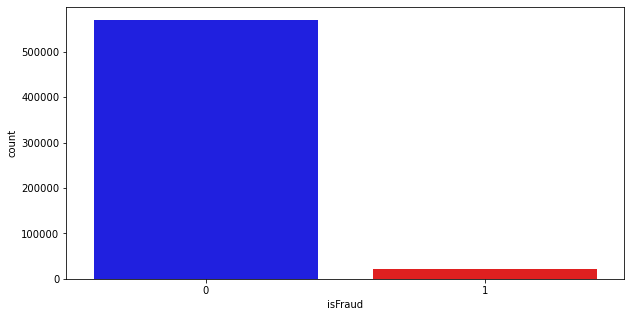

3.5 % of train_data tested as fraud
96.5 % of test_data tested as not fraud


In [17]:
# visualize the amount of fraud or not
plt.subplots(figsize=(10,5))
sns.countplot(train['isFraud'], palette=["blue", "red"])
plt.show()
print(np.round(train[train['isFraud']==1].shape[0]/train.shape[0]*100,2),'% of train_data tested as fraud')
print(np.round(train[train['isFraud']==0].shape[0]/train.shape[0]*100,2),'% of test_data tested as not fraud')

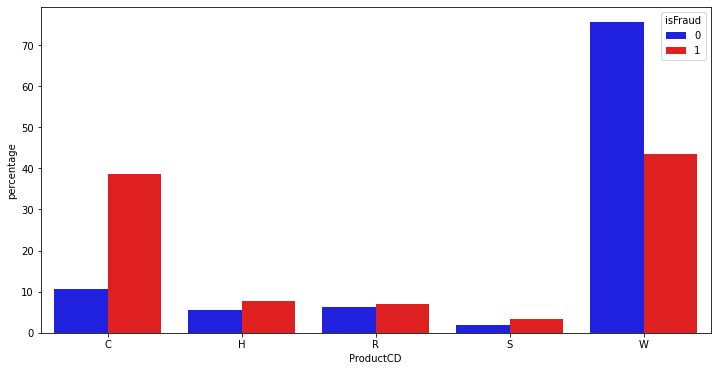

In [18]:
# visualize the fraud under ProductCD
plt.figure(figsize=(12,6))

train_ProductCD = (train.groupby(['isFraud'])['ProductCD']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD, palette=["blue", "red"]);

Text(0.5, 1.0, 'Train')

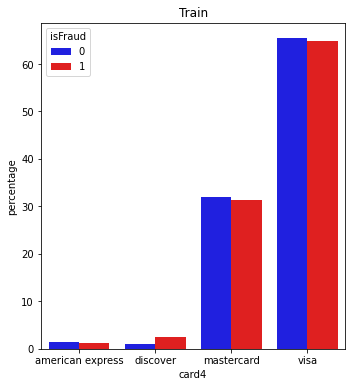

In [19]:
# visualize fraud under card4 
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4, palette=["blue", "red"])
plt.title('Train')

In [150]:
# figure out the correlation 
cor = train.corr()
rel = cor['isFraud'].sort_values(ascending = False)
rel

isFraud           1.000000
V257              0.280214
V246              0.268090
V244              0.265712
V242              0.263476
V201              0.246462
V200              0.238290
V45               0.235436
V189              0.225829
V86               0.222343
V87               0.221568
V258              0.220304
V188              0.219590
V44               0.217870
V228              0.207138
V170              0.203019
V52               0.195492
V171              0.182390
V199              0.182031
V51               0.182007
V230              0.179935
V40               0.174672
V79               0.167299
V39               0.166640
V38               0.165903
id_17             0.163755
V43               0.162243
V190              0.161992
V94               0.161454
V33               0.159394
V17               0.158972
V18               0.158933
V243              0.157394
V81               0.157356
V34               0.156433
V74               0.156239
V80               0.155256
V

<AxesSubplot:>

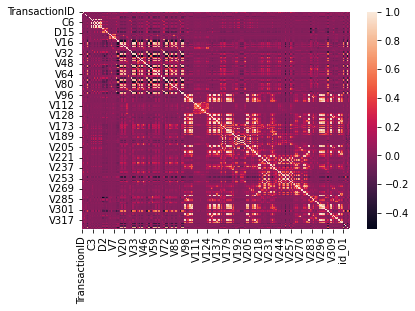

In [151]:
sns.heatmap(cor)

In [152]:
# select columns with relatively higher correlation
col = []
for i in range (len(rel)):
    if rel[i] > 0.1 or rel[i] < -0.1:
        col.append(rel.index[i])

In [153]:
# remove 'id_01', 'id_02' and 'id_17' because of 100% na in test data.
col.remove('id_01')
col.remove('id_02')
col.remove('id_17')

In [154]:
# find out the object data_type
tsf = []
for i in train.columns:
    if train.dtypes[i] == 'O':
        tsf.append(i)

In [155]:
# convert category columns to int
la = LabelEncoder()
for i in tsf:
    train[i] = la.fit_transform(train[i])

In [156]:
x = train[col]
x.drop('isFraud', inplace = True, axis = 1)
x.head()

,V257,V246,V244,V242,V201,V200,V45,V189,V86,V87,V258,V188,V44,V228,V170,V52,V171,V199,V51,V230,V40,V79,V39,V38,V43,V190,V94,V33,V17,V18,V243,V81,V34,V74,V80,V93,V15,V42,V92,card3,V16,V37,V50,V73,V58,V85,V84,V21,V57,V31,V176,V77,V32,V123,V22,V47,V72,V23,V302,V247,V222,V78,V304,V71,V63,V60,V59,V64,V303,V239,V111,V186,V113,V252,V184,V283,V125,V229,V24,V238,V259,V262,V221,V46,V112,V185,V282,V69,V90,V29
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [157]:
y = train['isFraud']
y

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [131]:
del train

In [158]:
# balancing
over = SMOTE()
x, y = over.fit_resample(x, y)
y.value_counts()

0    569877
1    569877
Name: isFraud, dtype: int64

In [159]:
x.describe()

,V257,V246,V244,V242,V201,V200,V45,V189,V86,V87,V258,V188,V44,V228,V170,V52,V171,V199,V51,V230,V40,V79,V39,V38,V43,V190,V94,V33,V17,V18,V243,V81,V34,V74,V80,V93,V15,V42,V92,card3,V16,V37,V50,V73,V58,V85,V84,V21,V57,V31,V176,V77,V32,V123,V22,V47,V72,V23,V302,V247,V222,V78,V304,V71,V63,V60,V59,V64,V303,V239,V111,V186,V113,V252,V184,V283,V125,V229,V24,V238,V259,V262,V221,V46,V112,V185,V282,V69,V90,V29
count,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06,1.139754e+06
mean,1.490025e+00,1.373191e+00,1.246157e+00,1.231685e+00,1.464811e+00,1.397519e+00,1.445635e+00,1.225958e+00,1.269056e+00,1.340680e+00,1.598548e+00,1.185108e+00,1.355249e+00,1.431430e+00,1.547461e+00,3.149122e-01,1.715530e+00,1.438096e+00,2.814192e-01,1.556296e+00,3.132284e-01,2.639831e-01,2.804370e-01,1.415319e+00,2.719036e-01,1.345278e+00,2.479950e-01,2.442111e-01,2.536843e-01,2.570875e-01,1.296525e+00,2.926031e-01,2.547924e-01,2.765813e-01,2.702157e-01,2.762596e-01,2.299580e-01,2.405126e-01,2.633883e-01,1.576333e+02,2.317933e-01,1.294725e+00,2.385643e-01,2.494356e-01,2.434944e-01,2.674781e-01,2.393653e-01,2.299584e-01,2.301140e-01,2.426108e-01,1.405199e+00,1.243036e+00,2.455478e-01,1.106128e+00,2.334790e-01,1.090541e+00,2.499924e-01,1.103812e+00,4.120536e-01,1.048732e+00,1.551906e+00,1.354028e+00,4.356063e-01,2.364738e-01,2.235162e-01,2.482673e-01,2.314580e-01,2.447052e-01,4.711336e-01,1.250096e-01,1.021851e+00,1.214316e+00,1.022690e+00,1.059147e+00,1.055895e-01,1.421974e+00,1.123943e+00,1.687902e+00,1.123980e+00,1.057391e-01,1.270172e+00,1.078682e+00,1.419117e+00,1.050808e+00,1.025043e+00,1.288198e-01,1.054460e+00,2.102499e-01,2.117085e-01,2.091085e-01
std,2.123585e+00,1.690505e+00,1.054709e+00,9.883039e-01,2.377398e+00,2.150457e+00,2.022492e+00,1.201527e+00,1.112877e+00,1.305974e+00,2.478369e+00,1.059361e+00,1.841711e+00,1.949916e+00,2.439739e+00,6.601406e-01,2.975459e+00,2.087418e+00,5.466860e-01,2.356894e+00,7.640283e-01,5.191589e-01,6.524246e-01,1.997580e+00,5.663575e-01,1.728376e+00,4.312501e-01,4.369449e-01,5.453698e-01,5.559851e-01,1.276251e+00,6.922975e-01,4.518733e-01,5.316325e-01,6.242473e-01,5.282967e-01,4.275255e-01,4.654109e-01,4.884650e-01,1.533138e+01,4.369760e-01,1.638997e+00,4.264514e-01,4.765238e-01,4.942790e-01,5.468845e-01,4.512418e-01,4.227006e-01,4.519963e-01,4.364966e-01,1.966725e+00,1.090273e+00,4.495891e-01,5.332462e-01,4.394202e-01,4.308078e-01,4.989244e-01,5.422125e-01,5.598195e-01,3.613756e-01,2.866865e+00,1.553753e+00,6.168991e-01,4.565381e-01,4.438477e-01,5.238424e-01,4.708562e-01,5.128422e-01,7.318139e-01,6.865716e-01,1.894746e-01,1.077689e+00,1.911878e-01,5.083650e-01,5.432385e-01,2.337018e+00,5.528112e-01,3.127007e+00,5.697376e-01,5.761750e-01,2.076241e+00,6.072463e-01,2.478055e+00,2.700925e-01,1.962264e-01,7.674669e-01,1.143596e+00,4.293668e-01,4.304870e-01,4.255590e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [161]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [162]:
predicted = rf.predict(x_train)
print("Accuracy using Random Forest is {} %".format(accuracy_score(predicted, y_train)*100))

Accuracy using Random Forest is 80.69254751028 %


In [163]:
predicted = rf.predict(x_test)
print("Accuracy using Random Forest is {} %".format(accuracy_score(predicted, y_test)*100))

Accuracy using Random Forest is 80.36141068790162 %


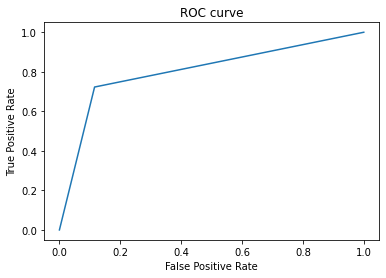

AUC value is 0.8036535326848454 


In [164]:
fpr, tpr, threshold= roc_curve(y_test, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

In [165]:
x.shape

(1139754, 90)

In [166]:
test.shape

(590540, 434)

In [167]:
# checking missing values
for i in test.columns:
    if test[i].isnull().sum() / len(test) * 100 > 80:
        test.drop(i, inplace = True, axis = 1)

In [168]:
# fill 0 into na
for i in test.columns:
    test[i] = test[i].fillna(test[i].mode()[0])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 339 entries, TransactionID to V321
dtypes: float64(321), int64(4), object(14)
memory usage: 1.5+ GB


In [169]:
# figure out object columns
o = []
for i in test.columns:
    if test.dtypes[i] == 'O':
        o.append(i)
o

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [170]:
# convert category to int
for i in o:
    test[i] = la.fit_transform(test[i])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 339 entries, TransactionID to V321
dtypes: float64(321), int64(18)
memory usage: 1.5 GB


In [171]:
# remove y from correlated variables
col.remove('isFraud')
col

['V257',
 'V246',
 'V244',
 'V242',
 'V201',
 'V200',
 'V45',
 'V189',
 'V86',
 'V87',
 'V258',
 'V188',
 'V44',
 'V228',
 'V170',
 'V52',
 'V171',
 'V199',
 'V51',
 'V230',
 'V40',
 'V79',
 'V39',
 'V38',
 'V43',
 'V190',
 'V94',
 'V33',
 'V17',
 'V18',
 'V243',
 'V81',
 'V34',
 'V74',
 'V80',
 'V93',
 'V15',
 'V42',
 'V92',
 'card3',
 'V16',
 'V37',
 'V50',
 'V73',
 'V58',
 'V85',
 'V84',
 'V21',
 'V57',
 'V31',
 'V176',
 'V77',
 'V32',
 'V123',
 'V22',
 'V47',
 'V72',
 'V23',
 'V302',
 'V247',
 'V222',
 'V78',
 'V304',
 'V71',
 'V63',
 'V60',
 'V59',
 'V64',
 'V303',
 'V239',
 'V111',
 'V186',
 'V113',
 'V252',
 'V184',
 'V283',
 'V125',
 'V229',
 'V24',
 'V238',
 'V259',
 'V262',
 'V221',
 'V46',
 'V112',
 'V185',
 'V282',
 'V69',
 'V90',
 'V29']

In [172]:
x_test_pre = test[col]
predicted = rf.predict(x_test_pre)
x_test_pre.shape

(590540, 90)

In [173]:
# prediction result
result = pd.DataFrame( {'TransactionID':test['TransactionID'], 'isFraud':predicted})
result

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0
...,...,...
590535,3577535,0
590536,3577536,0
590537,3577537,0
590538,3577538,0
